In [0]:
# %store -r df
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#!pip install numpy==1.15.4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ln -s drive/My\ Drive data # bash command


ln: failed to create symbolic link 'data/My Drive': Function not implemented


In [0]:
df = pandas.read_hdf('data/final_project_dl/reviews_100000.h5')
df['text_len'] = df['text'].str.len()
df['word_cnt'] = df.text.apply(lambda x: len(str(x).split()))

# Univariate Stats

In [5]:
df.describe()

,stars,useful,funny,cool,text_len,word_cnt
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,3.736920,1.279980,0.442580,0.54412,586.933740,108.570390
std,1.454589,2.919489,1.648487,2.04579,548.694712,101.858663
min,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,3.000000,0.000000,0.000000,0.00000,232.000000,43.000000
50%,4.000000,0.000000,0.000000,0.00000,416.000000,77.000000
75%,5.000000,1.000000,0.000000,0.00000,746.000000,138.000000
max,5.000000,101.000000,74.000000,94.00000,5000.000000,997.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
review_id      100000 non-null object
user_id        100000 non-null object
business_id    100000 non-null object
stars          100000 non-null float64
useful         100000 non-null int64
funny          100000 non-null int64
cool           100000 non-null int64
text           100000 non-null object
date           100000 non-null object
text_len       100000 non-null int64
word_cnt       100000 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


# Univariate Analysis

### pretty histogram and box & whisker function

In [0]:
def hist_box(x, bins):
    sns.set(style="ticks")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (.07, .93)})
    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist, bins=bins)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

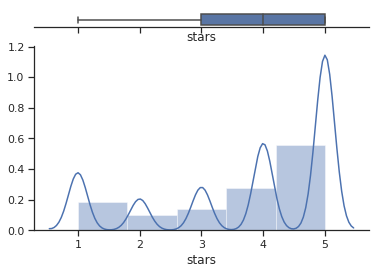

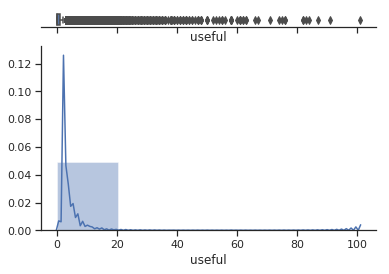

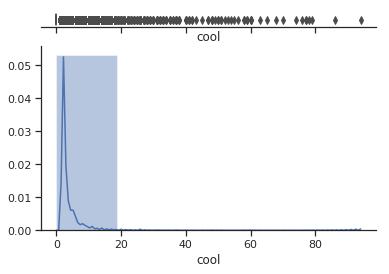

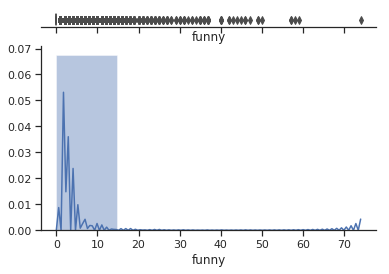

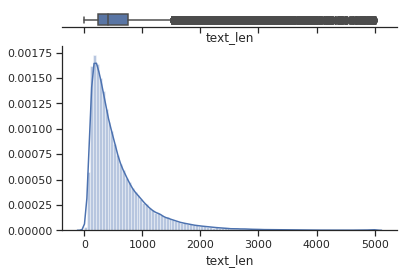

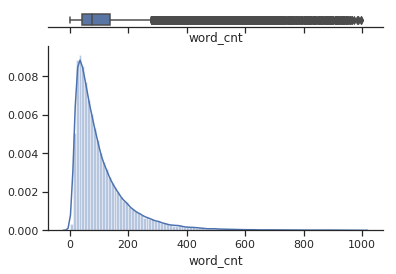

In [9]:
hist_box(df.stars,5)
hist_box(df.useful,5)
hist_box(df.cool,5)
hist_box(df.funny,5)
hist_box(df.text_len,100)
hist_box(df.word_cnt,100)

### basic histograms

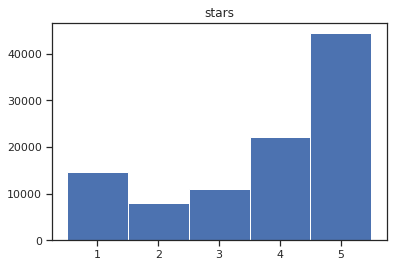

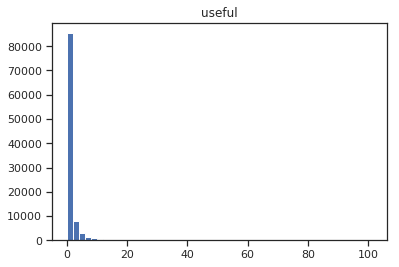

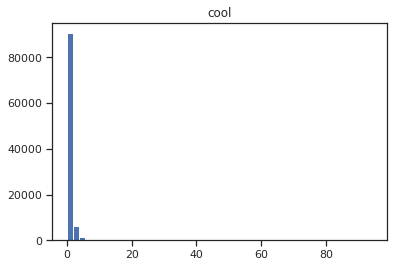

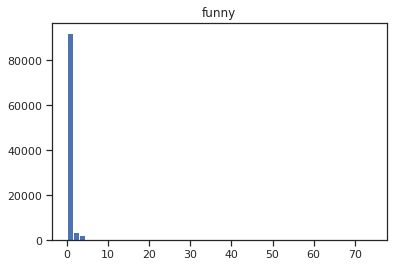

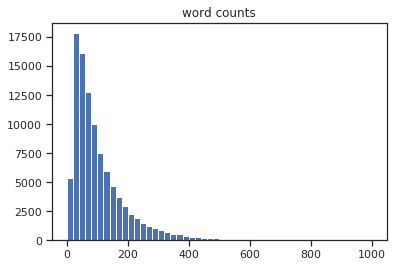

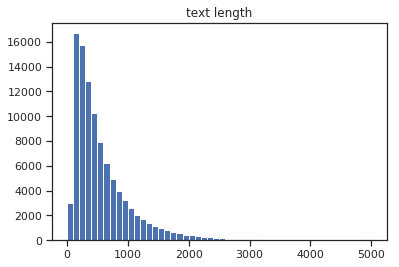

In [12]:
plt.hist(df.stars,range=(0.5, 5.5), bins=5) ; plt.title('stars')       ; plt.show()
plt.hist(df.useful,   bins=50) ; plt.title('useful')      ; plt.show()
plt.hist(df.cool,     bins=50) ; plt.title('cool')        ; plt.show()
plt.hist(df.funny,    bins=50) ; plt.title('funny')       ; plt.show()
plt.hist(df.word_cnt, bins=50) ; plt.title('word counts') ; plt.show()
plt.hist(df.text_len, bins=50) ; plt.title('text length') ; plt.show()

# Correlation Analysis

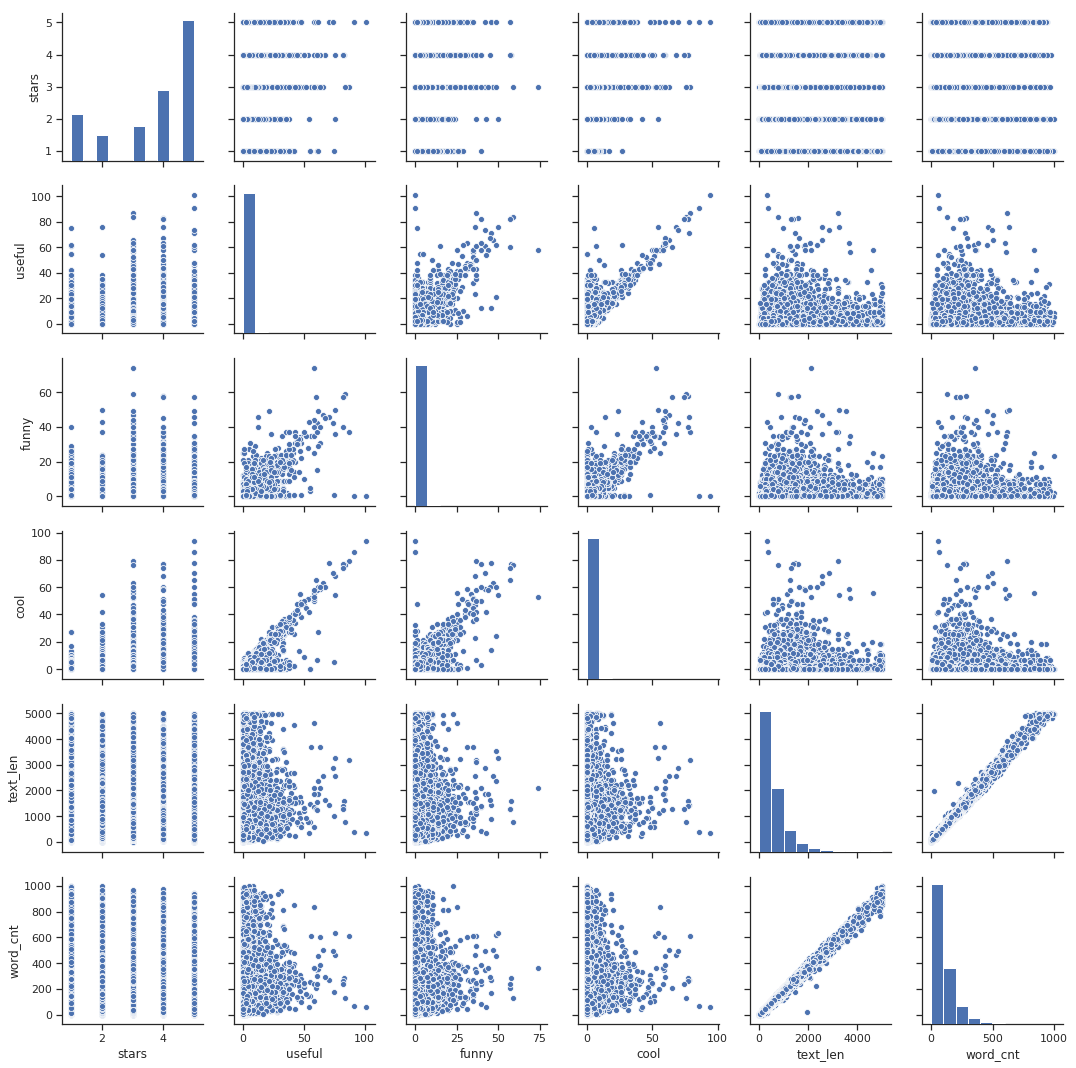

In [13]:
import seaborn as sns
sns.pairplot(df)
plt.show()

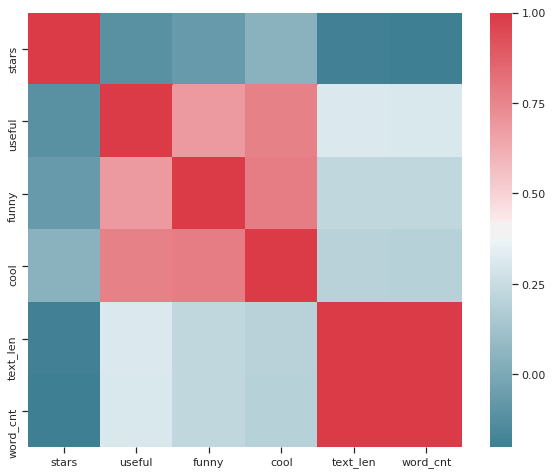

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, 
            ax=ax)
plt.show()